In [129]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer  # Add this line
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import plotly.express as px
from sklearn import ensemble, linear_model, metrics, neural_network, tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor



In [130]:
#feature
merge_overlevelsesestimater=False
#for feature cancer
cancer_features=True
variabelutvinning=False

#Beste metode for NaN verdier
run_grid_search_Kneighbors= False
KNNimputer=True
fill_in_mean=False

#modeller
run_grid_search_RandomTree  =True
rund_grid_search_mlp=True
run_grid_search_gradient=True
run_grid_search_ExtraTree=True

run_grid_search_forAll = False


#for uteliggere 
apply_winsorize=False
remove_100=False
if_clip=True


cross_validation=False

imputer_urin=True





#### Leser inn datasettet

In [131]:
dir = 'prepared_data.csv'
df = pd.read_csv(dir)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

df

,alder,utdanning,inntekt,kjønn,etnisitet,oppholdslengde,blodtrykk,hvite_blodlegemer,hjertefrekvens,respirasjonsfrekvens,kroppstemperatur,lungefunksjon,serumalbumin,kreatinin,natrium,blod_ph,glukose,blodurea_nitrogen,urinmengde,antall_komorbiditeter,koma_score,adl_stedfortreder,fysiologisk_score,apache_fysiologisk_score,overlevelsesestimat_2mnd,overlevelsesestimat_6mnd,diabetes,demens,lege_overlevelsesestimat_2mnd,lege_overlevelsesestimat_6mnd,kreft_metastatic,kreft,sykdom_CHF,sykdom_COPD,sykdom_Cirrhosis,sykdom_Colon_Cancer,sykdom_Coma,sykdom_Lung_Cancer,sykdom_MOSF w/Malig
0,60.33899,12.0,1.0,0,0,4,43.0,2.0,112.0,34.0,2,3.0,NaN,5.500000,132.0,-1.0,NaN,NaN,NaN,2,44.0,1.0,52.695312,74.0,0.001000,0.000000,0,0,0.00,0.000,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,52.74698,12.0,0.0,0,0,17,70.0,NaN,88.0,28.0,0,1.0,NaN,2.000000,134.0,1.0,NaN,NaN,NaN,2,0.0,0.0,20.500000,45.0,0.790894,0.664917,0,0,0.75,0.500,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,42.38498,11.0,0.0,0,0,3,75.0,NaN,88.0,32.0,2,NaN,NaN,0.799927,139.0,NaN,NaN,NaN,NaN,2,0.0,0.0,20.097656,19.0,0.698975,0.411987,0,0,0.90,0.500,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,93.01599,14.0,NaN,1,0,4,110.0,NaN,101.0,44.0,3,1.0,NaN,0.699951,140.0,1.0,NaN,NaN,NaN,1,55.0,1.0,19.398438,27.0,0.284973,0.214996,0,0,0.00,0.000,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,62.37097,14.0,2.0,1,0,9,78.0,2.0,120.0,28.0,0,0.0,4.799805,1.599854,132.0,1.0,NaN,NaN,NaN,1,0.0,1.0,17.296875,46.0,0.892944,0.820923,0,0,NaN,0.700,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7729,66.07300,8.0,NaN,1,0,23,109.0,NaN,104.0,22.0,2,1.0,3.699707,1.099854,131.0,1.0,188.0,21.0,NaN,1,0.0,0.0,16.296875,22.0,0.852905,0.801880,0,0,0.80,0.512,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7730,55.15399,11.0,NaN,0,0,29,43.0,NaN,0.0,8.0,3,1.0,NaN,5.899414,135.0,-1.0,190.0,49.0,0.0,1,41.0,0.0,25.796875,31.0,0.553955,0.485962,0,0,0.50,0.500,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7731,70.38196,NaN,NaN,1,0,8,111.0,NaN,83.0,24.0,0,2.0,NaN,2.699707,139.0,0.0,189.0,60.0,3900.0,1,0.0,NaN,22.699219,39.0,0.741943,0.660889,0,0,0.90,0.800,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7732,47.01999,13.0,NaN,1,0,7,99.0,NaN,110.0,24.0,2,0.0,1.199951,3.500000,135.0,1.0,246.0,55.0,NaN,1,0.0,0.0,40.195312,51.0,0.177979,0.091995,0,0,0.09,0.090,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Slår sammen de med høy korrelasjon

In [132]:
if merge_overlevelsesestimater:
    df['lege_overlevelsesestimat_avg'] = df[['lege_overlevelsesestimat_6mnd', 'lege_overlevelsesestimat_2mnd']].mean(axis=1)

    df.drop(['lege_overlevelsesestimat_6mnd', 'lege_overlevelsesestimat_2mnd'], axis=1, inplace=True)

    df['overlevelsesestimat_avg'] = df[['overlevelsesestimat_6mnd', 'overlevelsesestimat_2mnd']].mean(axis=1)

    df.drop(['overlevelsesestimat_6mnd', 'overlevelsesestimat_2mnd'], axis=1, inplace=True)

    df['fysiologisk score_avg'] = df[['apache_fysiologisk_score', 'fysiologisk_score']].mean(axis=1)

    df.drop(['apache_fysiologisk_score', 'fysiologisk_score'], axis=1, inplace=True)    



In [133]:
X = df.drop('oppholdslengde', axis=1)
y = df['oppholdslengde']

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

train_df = pd.concat([X_train, y_train], axis=1)

X_train_copy = X_train.copy()
y_train_copy = y_train.copy()
y_val_copy = y_val.copy()
X_val_copy = X_val.copy()


#### Analyserer omfang av manglende data 

In [134]:
train_df.isnull().sum()

alder                               5
utdanning                         978
inntekt                          1793
kjønn                               0
etnisitet                           0
blodtrykk                           0
hvite_blodlegemer                2466
hjertefrekvens                      0
respirasjonsfrekvens                0
kroppstemperatur                    0
lungefunksjon                    1373
serumalbumin                     1992
kreatinin                          42
natrium                             0
blod_ph                          1354
glukose                          2660
blodurea_nitrogen                2568
urinmengde                       2864
antall_komorbiditeter               0
koma_score                          0
adl_stedfortreder                1714
fysiologisk_score                   0
apache_fysiologisk_score            0
overlevelsesestimat_2mnd            0
overlevelsesestimat_6mnd            0
diabetes                            0
demens      

In [135]:
#import missingno as msno
#import matplotlib.pyplot as plt

#msno.matrix(train_df)

#plt.figure(figsize=(6,4)) 
#msno.heatmap(train_df)
#plt.show()

#### Setter inn for NaN-verdier.

In [136]:
print(X_train.columns)


Index(['alder', 'utdanning', 'inntekt', 'kjønn', 'etnisitet', 'blodtrykk',
       'hvite_blodlegemer', 'hjertefrekvens', 'respirasjonsfrekvens',
       'kroppstemperatur', 'lungefunksjon', 'serumalbumin', 'kreatinin',
       'natrium', 'blod_ph', 'glukose', 'blodurea_nitrogen', 'urinmengde',
       'antall_komorbiditeter', 'koma_score', 'adl_stedfortreder',
       'fysiologisk_score', 'apache_fysiologisk_score',
       'overlevelsesestimat_2mnd', 'overlevelsesestimat_6mnd', 'diabetes',
       'demens', 'lege_overlevelsesestimat_2mnd',
       'lege_overlevelsesestimat_6mnd', 'kreft_metastatic', 'kreft',
       'sykdom_CHF', 'sykdom_COPD', 'sykdom_Cirrhosis', 'sykdom_Colon_Cancer',
       'sykdom_Coma', 'sykdom_Lung_Cancer', 'sykdom_MOSF w/Malig'],
      dtype='object')


In [137]:
X_train.isnull().sum()



alder                               5
utdanning                         978
inntekt                          1793
kjønn                               0
etnisitet                           0
blodtrykk                           0
hvite_blodlegemer                2466
hjertefrekvens                      0
respirasjonsfrekvens                0
kroppstemperatur                    0
lungefunksjon                    1373
serumalbumin                     1992
kreatinin                          42
natrium                             0
blod_ph                          1354
glukose                          2660
blodurea_nitrogen                2568
urinmengde                       2864
antall_komorbiditeter               0
koma_score                          0
adl_stedfortreder                1714
fysiologisk_score                   0
apache_fysiologisk_score            0
overlevelsesestimat_2mnd            0
overlevelsesestimat_6mnd            0
diabetes                            0
demens      

In [138]:
X_train.drop(['glukose', 'blodurea_nitrogen'], axis=1, inplace=True)
X_val.drop(['glukose', 'blodurea_nitrogen'], axis=1, inplace=True)


In [139]:
if imputer_urin:
    X_train['urinmengde'] = X_train['urinmengde'].fillna(2502)
    X_val['urinmengde'] = X_val['urinmengde'].fillna(2502)
    X_train.isnull().sum()

    # Nå kan du kategorisere urinmengde som før (normal vs unormal)
    bins = [0, 800, 1500, np.inf]
    labels = [1, 0, 1]

    X_train['urinmengde'] = pd.cut(X_train['urinmengde'], bins=bins, labels=labels, right=False, ordered=False).astype(int)
    X_val['urinmengde'] = pd.cut(X_val['urinmengde'], bins=bins, labels=labels, right=False, ordered=False).astype(int)
    #X_test['urinmengde'] = pd.cut(X_test['urinmengde'], bins=bins, labels=labels, right=False, ordered=False).astype(int)

    #X_train=imputer.fit_transform(X_train)


In [140]:
X_train['blod_ph']=X_train['blod_ph'].fillna(7.40)
X_val['blod_ph']= X_val['blod_ph'].fillna(7.40)
X_train['lungefunksjon']=X_train['lungefunksjon'].fillna(333.3)
X_val['lungefunksjon']=X_train['lungefunksjon'].fillna(333.3)


In [141]:
#Sjekker for flere 

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold


extraTree = ExtraTreesRegressor(max_depth=50, max_features=0.5, min_samples_leaf=5, min_samples_split=2, n_estimators=450)
mlp = MLPRegressor(activation='relu', alpha=0.0001, hidden_layer_sizes=(100,), learning_rate='constant', learning_rate_init=0.001, solver='adam')
gradient = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, max_features='log2', min_samples_leaf=5, min_samples_split=2, subsample=1.0)
randomForest = RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=5, min_samples_split=2, n_estimators=250, oob_score=True)

param_grids = {
    'ExtraTreesRegressor': {
        'model__n_estimators': [450],
        'model__max_depth': [50],
        'model__min_samples_split': [2],
        'model__min_samples_leaf': [5],
        'model__max_features': [0.5]
    },
    'GradientBoostingRegressor': {
        'model__n_estimators': [100],  
        'model__learning_rate': [0.1],
        'model__max_depth': [3],
        'model__max_features': ['log2'],
        'model__min_samples_split': [2],
        'model__min_samples_leaf': [5],
        'model__subsample': [1.0]
    },
    'RandomForestRegressor': {
        'model__n_estimators': [250],
        'model__max_depth': [20],
        'model__min_samples_split': [2],
        'model__min_samples_leaf': [5],
        'model__max_features': ['sqrt']
    },
    'MLPRegressor': {
        'model__activation': ['relu'],
        'model__alpha': [0.0001],
        'model__hidden_layer_sizes': [(100,)],
        'model__learning_rate': ['constant'],
        'model__learning_rate_init': [0.001],
        'model__solver': ['adam']
    }
}

imputers = {
    'SimpleMean': SimpleImputer(strategy='mean'),
    'SimpleMedian': SimpleImputer(strategy='median'),
    'SimpleMostFrequent': SimpleImputer(strategy='most_frequent'),
    'KNN50': KNNImputer(n_neighbors=50),
    'KNN100': KNNImputer(n_neighbors=100),
    'KNN150': KNNImputer(n_neighbors=150),  
}


if run_grid_search_forAll:
    # Prepare models for iteration
    models = [
        ('ExtraTreesRegressor', extraTree),
        ('GradientBoostingRegressor', gradient),
        ('RandomForestRegressor', randomForest),
        ('MLPRegressor', mlp)
    ]

    # Prepare results storage
    results = []

    # Loop over imputers and models
    for imputer_name, imputer in imputers.items():
        for model_name, model in models:

            # Create a pipeline with the imputer and model
            pipeline = Pipeline([
                ('imputer', imputer),
                ('model', model)
            ])

            # Get the parameter grid for the current model
            param_grid = param_grids[model_name]
            cv=KFold(n_splits=5, shuffle=True, random_state=42)


            # Use GridSearchCV to find the best hyperparameters
            grid_search = GridSearchCV(
                estimator=pipeline,
                param_grid=param_grid,
                cv=cv,  # 5-fold cross-validation
                scoring='neg_mean_squared_error',
                n_jobs=-1,  # Use all available cores
                verbose=1
            )

            # Before fitting the model, apply the imputer on X_train and X_val datasets
            if imputer_name.startswith("KNN"):
                # Specific case for KNNImputer with n_neighbors for NaN values
                imputer_transformer = KNNImputer(n_neighbors=int(imputer_name.replace('KNN', '')))
            else:
                imputer_transformer = imputer

            X_train_imputed = imputer_transformer.fit_transform(X_train_copy)
            X_val_imputed = imputer_transformer.transform(X_val_copy)

            X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train_copy.columns)
            X_val_imputed = pd.DataFrame(X_val_imputed, columns=X_val_copy.columns)

            # Fit GridSearchCV
            grid_search.fit(X_train_imputed, y_train_copy)

            # Best model after grid search
            best_model = grid_search.best_estimator_

            # Predict on validation set
            y_pred = best_model.predict(X_val_imputed)

            # Calculate RMSE on validation set
            rmse = np.sqrt(mean_squared_error(y_val_copy, y_pred))

            # Store the results
            results.append({
                'Imputer': imputer_name,
                'Model': model_name,
                'Best Params': grid_search.best_params_,
                'RMSE': rmse
            })

    # Convert the results to a DataFrame and display sorted by RMSE
    results_df = pd.DataFrame(results).sort_values(by='RMSE')
    
    # Display only relevant columns (without hyperparameters)
    results_df_clean = results_df[['Imputer', 'Model', 'RMSE']].sort_values(by='RMSE')
    print(results_df_clean)






In [142]:
if cross_validation:
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import mean_squared_error
    import numpy as np
    import pandas as pd

    # Define models
    extraTree = ExtraTreesRegressor(max_depth=50, max_features=0.5, min_samples_leaf=5, min_samples_split=2, n_estimators=450, random_state=42)
    mlp = MLPRegressor(activation='relu', alpha=0.0001, hidden_layer_sizes=(100,), learning_rate='constant', learning_rate_init=0.001, solver='adam', random_state=42)
    gradient = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, max_features='log2', min_samples_leaf=5, min_samples_split=2, subsample=1.0, random_state=42)
    randomForest = RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=5, min_samples_split=2, n_estimators=250, oob_score=True, random_state=42)

    # Define imputers
    imputers = {
        'SimpleMean': SimpleImputer(strategy='mean'),
        'SimpleMedian': SimpleImputer(strategy='median'),
        'SimpleMostFrequent': SimpleImputer(strategy='most_frequent'),
        'KNN50': KNNImputer(n_neighbors=50),
        'KNN100': KNNImputer(n_neighbors=100),
        'KNN150': KNNImputer(n_neighbors=150),  
    }

    # Define models (including several)
    models = [
        tree.DecisionTreeRegressor(random_state=42),
        gradient,
        extraTree,
        randomForest,
        mlp,
        linear_model.Lasso(alpha=0.1, random_state=42)
    ]

    # Result storage
    results = []

    # Cross-validation loop over imputers and models
    for imputer_name, imputer in imputers.items():
        for model in models:
            # Create pipeline with the imputer and model
            pipeline = Pipeline([
                ('imputer', imputer),
                ('model', model)
            ])

            # Calculate RMSE using cross-validation (5 folds)
            scores = cross_val_score(pipeline, X_train_copy, y_train_copy, cv=5, scoring='neg_mean_squared_error')

            # Average RMSE from 5 folds
            avg_rmse = np.mean(np.sqrt(-scores))

            # Store the results
            results.append({
                'Imputer': imputer_name,
                'Model': model.__class__.__name__,
                'RMSE': avg_rmse
            })

    # Convert the results to DataFrame and sort by RMSE
    results_df = pd.DataFrame(results).sort_values(by='RMSE')
    
    # Print the sorted results DataFrame
    print(results_df)


In [143]:
if KNNimputer:
    imputer = KNNImputer(n_neighbors=100)
    X_train_imputed = imputer.fit_transform(X_train)
    X_val_imputed = imputer.transform(X_val)
    #X_test_imputed = imputer.transform(X_test)

# Create DataFrame using the actual columns of X_train after transformation
    X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
    X_val = pd.DataFrame(X_val_imputed, columns=X_val.columns)
    #X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# Concatenating the y_train with X_train
    train_df = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)

# Check for nulls
    print(train_df.isnull().sum())


    #X_train = imputer.fit_transform(X_train)
    #X_train = pd.DataFrame(X_train, columns=X.columns)
    #X_val = imputer.transform(X_val)
    #X_test = imputer.transform(X_test)
    #train_df = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
    #print(train_df.isnull().sum())
    
X_train


alder                            0
utdanning                        0
inntekt                          0
kjønn                            0
etnisitet                        0
blodtrykk                        0
hvite_blodlegemer                0
hjertefrekvens                   0
respirasjonsfrekvens             0
kroppstemperatur                 0
lungefunksjon                    0
serumalbumin                     0
kreatinin                        0
natrium                          0
blod_ph                          0
urinmengde                       0
antall_komorbiditeter            0
koma_score                       0
adl_stedfortreder                0
fysiologisk_score                0
apache_fysiologisk_score         0
overlevelsesestimat_2mnd         0
overlevelsesestimat_6mnd         0
diabetes                         0
demens                           0
lege_overlevelsesestimat_2mnd    0
lege_overlevelsesestimat_6mnd    0
kreft_metastatic                 0
kreft               

,alder,utdanning,inntekt,kjønn,etnisitet,blodtrykk,hvite_blodlegemer,hjertefrekvens,respirasjonsfrekvens,kroppstemperatur,lungefunksjon,serumalbumin,kreatinin,natrium,blod_ph,urinmengde,antall_komorbiditeter,koma_score,adl_stedfortreder,fysiologisk_score,apache_fysiologisk_score,overlevelsesestimat_2mnd,overlevelsesestimat_6mnd,diabetes,demens,lege_overlevelsesestimat_2mnd,lege_overlevelsesestimat_6mnd,kreft_metastatic,kreft,sykdom_CHF,sykdom_COPD,sykdom_Cirrhosis,sykdom_Colon_Cancer,sykdom_Coma,sykdom_Lung_Cancer,sykdom_MOSF w/Malig
0,74.12500,12.00,0.00,1.0,0.0,77.0,1.78,60.0,24.0,2.0,0.0,2.599609,0.899902,139.0,-1.0,1.0,3.0,0.0,0.0,21.097656,17.0,0.732910,0.580933,0.0,0.0,0.9000,0.90000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,65.26495,12.00,1.00,1.0,0.0,46.0,2.00,160.0,38.0,3.0,2.0,2.799805,1.500000,131.0,-1.0,1.0,5.0,44.0,0.0,46.898438,71.0,0.046997,0.004999,0.0,0.0,0.1000,0.00100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,71.98395,12.00,0.75,1.0,0.0,115.0,1.78,74.0,22.0,1.0,2.0,3.302747,1.699951,137.0,0.0,1.0,3.0,0.0,0.0,20.398438,26.0,0.741943,0.661987,1.0,0.0,0.9000,0.90000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.26599,20.00,3.00,1.0,2.0,77.0,1.38,60.0,20.0,2.0,333.3,3.162761,1.699951,135.0,7.4,0.0,1.0,0.0,0.0,37.195312,22.0,0.404968,0.106995,0.0,0.0,0.7355,0.57942,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,69.77100,12.00,3.00,1.0,0.0,57.0,2.00,165.0,40.0,1.0,1.0,2.536792,1.299805,138.0,0.0,0.0,1.0,0.0,0.0,5.599609,9.0,0.865967,0.700928,0.0,0.0,0.7580,0.62235,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5408,58.71597,9.00,0.00,1.0,0.0,117.0,2.00,76.0,24.0,2.0,0.0,4.299805,1.199951,137.0,0.0,1.0,7.0,0.0,0.0,11.898438,13.0,0.934937,0.889893,0.0,0.0,0.8000,0.70000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5409,81.90594,11.69,0.00,0.0,0.0,103.0,1.82,64.0,16.0,2.0,1.0,4.500000,1.199951,134.0,1.0,1.0,3.0,0.0,5.0,13.298828,29.0,0.852905,0.756958,0.0,0.0,0.9000,0.90000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5410,60.37000,12.00,3.00,0.0,0.0,73.0,1.36,80.0,20.0,3.0,333.3,3.471748,0.699951,136.0,7.4,1.0,1.0,0.0,0.0,13.798828,11.0,0.861938,0.691895,0.0,0.0,0.8000,0.50000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5411,80.05499,8.00,1.00,1.0,0.0,127.0,1.80,102.0,38.0,1.0,2.0,3.099609,1.699951,147.0,1.0,1.0,3.0,0.0,1.0,27.898438,57.0,0.605957,0.416992,0.0,0.0,0.9500,0.80000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
if fill_in_mean:
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(X_train)
    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_val = imputer.transform(X_val)
    X_test = imputer.transform(X_test)
    train_df = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
    print(train_df.isnull().sum())

    


#### Variabelutvinning

In [145]:
if variabelutvinning:
    # Create the feature in the training set
    X_train['nyrefunksjon_score'] = X_train['kreatinin'] + X_train['blodurea_nitrogen'] + X_train['urinmengde']
    X_val['nyrefunksjon_score'] = X_val['kreatinin'] + X_val['blodurea_nitrogen'] + X_val['urinmengde']

    X_train['fysiologisk_komorbiditet'] = X_train['fysiologisk score_avg'] + X_train['antall_komorbiditeter']
    X_val['fysiologisk_komorbiditet'] = X_val['fysiologisk score_avg'] + X_val['antall_komorbiditeter']





# Remove it from validation set if accidentally added (but avoid this if possible)
#if 'nyrefunksjon_score' in X_val:
    #X_val = X_val.drop('nyrefunksjon_score', axis=1)

#model.fit(X_train, y_train)

# Og også når du predikerer
#y_pred = model.predict(X_val)


In [146]:
if cancer_features:
    # Create boolean columns for individual cancers
    X_train['has_lung_cancer'] = X_train['sykdom_Lung_Cancer'].astype(bool)
    X_train['has_colon_cancer'] = X_train['sykdom_Colon_Cancer'].astype(bool)
    X_train['kreft'] = X_train['kreft'].astype(bool)

    X_train['has_any_cancer'] = (
        X_train['has_lung_cancer'] |
        X_train['has_colon_cancer'] |
        X_train['kreft']
    )

    X_val['has_lung_cancer'] = X_val['sykdom_Lung_Cancer'].astype(bool)
    X_val['has_colon_cancer'] = X_val['sykdom_Colon_Cancer'].astype(bool)
    X_val['kreft'] = X_val['kreft'].astype(bool)

    X_val['has_any_cancer'] = (
        X_val['has_lung_cancer'] |
        X_val['has_colon_cancer'] |
        X_val['kreft']
    )

    # Drop original cancer columns
    X_train.drop(['sykdom_Lung_Cancer', 'sykdom_Colon_Cancer', 'kreft'], axis=1, inplace=True)
    X_val.drop(['sykdom_Lung_Cancer', 'sykdom_Colon_Cancer', 'kreft'], axis=1, inplace=True)
    X_train.drop(['has_lung_cancer', 'has_colon_cancer'], axis=1, inplace=True)
    X_val.drop(['has_lung_cancer', 'has_colon_cancer'], axis=1, inplace=True)



X_train.columns

Index(['alder', 'utdanning', 'inntekt', 'kjønn', 'etnisitet', 'blodtrykk',
       'hvite_blodlegemer', 'hjertefrekvens', 'respirasjonsfrekvens',
       'kroppstemperatur', 'lungefunksjon', 'serumalbumin', 'kreatinin',
       'natrium', 'blod_ph', 'urinmengde', 'antall_komorbiditeter',
       'koma_score', 'adl_stedfortreder', 'fysiologisk_score',
       'apache_fysiologisk_score', 'overlevelsesestimat_2mnd',
       'overlevelsesestimat_6mnd', 'diabetes', 'demens',
       'lege_overlevelsesestimat_2mnd', 'lege_overlevelsesestimat_6mnd',
       'kreft_metastatic', 'sykdom_CHF', 'sykdom_COPD', 'sykdom_Cirrhosis',
       'sykdom_Coma', 'sykdom_MOSF w/Malig', 'has_any_cancer'],
      dtype='object')

In [147]:
X_train.columns

Index(['alder', 'utdanning', 'inntekt', 'kjønn', 'etnisitet', 'blodtrykk',
       'hvite_blodlegemer', 'hjertefrekvens', 'respirasjonsfrekvens',
       'kroppstemperatur', 'lungefunksjon', 'serumalbumin', 'kreatinin',
       'natrium', 'blod_ph', 'urinmengde', 'antall_komorbiditeter',
       'koma_score', 'adl_stedfortreder', 'fysiologisk_score',
       'apache_fysiologisk_score', 'overlevelsesestimat_2mnd',
       'overlevelsesestimat_6mnd', 'diabetes', 'demens',
       'lege_overlevelsesestimat_2mnd', 'lege_overlevelsesestimat_6mnd',
       'kreft_metastatic', 'sykdom_CHF', 'sykdom_COPD', 'sykdom_Cirrhosis',
       'sykdom_Coma', 'sykdom_MOSF w/Malig', 'has_any_cancer'],
      dtype='object')

#### Informasjon, 'Viktig informasjon'

In [148]:
X = train_df.drop(columns=['oppholdslengde'])
y = train_df['oppholdslengde']

mi = mutual_info_regression(X, y)

mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi
})

mi_df_sorted = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df_sorted)


                          Feature  Mutual Information
20       apache_fysiologisk_score            0.095407
19              fysiologisk_score            0.093649
25  lege_overlevelsesestimat_2mnd            0.070029
21       overlevelsesestimat_2mnd            0.047532
17                     koma_score            0.047186
18              adl_stedfortreder            0.040553
22       overlevelsesestimat_6mnd            0.039877
34             sykdom_Lung_Cancer            0.030905
26  lege_overlevelsesestimat_6mnd            0.029455
32            sykdom_Colon_Cancer            0.023394
27               kreft_metastatic            0.022765
16          antall_komorbiditeter            0.022254
8            respirasjonsfrekvens            0.018207
11                   serumalbumin            0.016104
29                     sykdom_CHF            0.014938
2                         inntekt            0.013988
13                        natrium            0.011786
9                kroppstempe

In [149]:
model = ExtraTreesRegressor(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.to_string(index=False, header=["Feature", "Importance Information"]))


                      Feature Importance Information
     apache_fysiologisk_score               0.051880
            fysiologisk_score               0.048777
                        alder               0.045250
     overlevelsesestimat_2mnd               0.044750
lege_overlevelsesestimat_2mnd               0.043247
     overlevelsesestimat_6mnd               0.042925
                    utdanning               0.042310
                      natrium               0.042195
                    blodtrykk               0.041456
                    kreatinin               0.040703
         respirasjonsfrekvens               0.040484
            adl_stedfortreder               0.040240
                 serumalbumin               0.039567
lege_overlevelsesestimat_6mnd               0.038892
               hjertefrekvens               0.035306
        antall_komorbiditeter               0.032830
                      inntekt               0.031189
             kroppstemperatur               0.

In [150]:
X_train.drop(['overlevelsesestimat_6mnd', 'overlevelsesestimat_2mnd', 'demens', 'koma_score'], axis=1, inplace=True)   
X_val.drop(['overlevelsesestimat_6mnd', 'overlevelsesestimat_2mnd', 'demens', 'koma_score'], axis=1, inplace=True)


In [151]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

fig = px.bar(feature_importance_df, x='Importance', y='Feature', orientation='h', title="Feature Importance")
fig.show()

In [152]:
#X_train.drop(['sykdom_MOSF w/Malig', 'demens', 'sykdom_Coma', 'sykdom_Cirrhosis', 'sykdom_COPD', 'diabetes', 'urinmengde', 'kreft'], axis=1, inplace=True)
#X_val.drop(['sykdom_MOSF w/Malig', 'demens', 'sykdom_Coma', 'sykdom_Cirrhosis', 'sykdom_COPD', 'diabetes', 'urinmengde', 'kreft'], axis=1, inplace=True)


#### Ser gjennom for oppholdslengde

In [153]:
oppholdslengde_statistikk = train_df['oppholdslengde'].describe()
oppholdslengde_statistikk

count    5413.000000
mean       17.883059
std        21.642808
min         3.000000
25%         6.000000
50%        11.000000
75%        20.000000
max       281.000000
Name: oppholdslengde, dtype: float64

#### Sjekker om det er store outliers, og ser om log forbedrer disse. 

In [154]:
# Beregner gjennomsnittet for oppholdslengde
import plotly.express as px

oppholdslenge_gjennomsnitt = train_df['oppholdslengde'].mean()

# Lager histogrammet med Plotly Express
fig = px.histogram(train_df, x='oppholdslengde', nbins=40, title='Histogram for Oppholdslengde')

# Legger til gjennomsnittet som en vertikal linje
fig.add_vline(x=oppholdslenge_gjennomsnitt, line_dash="dash", line_color="red", 
              annotation_text=f"Gjennomsnitt: {oppholdslenge_gjennomsnitt:.2f}",
              annotation_position="top right")

# Tilpasser aksene og labels
fig.update_layout(
    xaxis_title='Oppholdslengde (dager)',
    yaxis_title='Antall pasienter',
    bargap=0.2,  # Justerer mellomrom mellom søylene
    showlegend=False
)

# Viser histogrammet
fig.show()

In [155]:
# Lag en boksplott med Plotly Express
import plotly.express as px
fig = px.box(train_df, x='oppholdslengde', title="Box Plot of 'Faktisk oppholdslengde' Column")


# Vis plottet
fig.show()

#### Prøver å bruke log på  uteliggere

In [156]:
train_df['oppholdslengde_log'] = np.log(train_df['oppholdslengde'])  # Bruk log1p for å håndtere verdier som kan være 0

# Lag en boksplot for den log-transformerte kolonnen
fig = px.box(train_df, x='oppholdslengde_log', title="Box Plot of 'Log-Transformert oppholdslengde' Column")

# Vis plottet
fig.show()

#### Visualiserer sykdommer for de med langt opphold og mindre opphold. 

In [157]:
train_df.columns

Index(['alder', 'utdanning', 'inntekt', 'kjønn', 'etnisitet', 'blodtrykk',
       'hvite_blodlegemer', 'hjertefrekvens', 'respirasjonsfrekvens',
       'kroppstemperatur', 'lungefunksjon', 'serumalbumin', 'kreatinin',
       'natrium', 'blod_ph', 'urinmengde', 'antall_komorbiditeter',
       'koma_score', 'adl_stedfortreder', 'fysiologisk_score',
       'apache_fysiologisk_score', 'overlevelsesestimat_2mnd',
       'overlevelsesestimat_6mnd', 'diabetes', 'demens',
       'lege_overlevelsesestimat_2mnd', 'lege_overlevelsesestimat_6mnd',
       'kreft_metastatic', 'kreft', 'sykdom_CHF', 'sykdom_COPD',
       'sykdom_Cirrhosis', 'sykdom_Colon_Cancer', 'sykdom_Coma',
       'sykdom_Lung_Cancer', 'sykdom_MOSF w/Malig', 'oppholdslengde'],
      dtype='object')

In [1]:
short_stays = train_df[train_df['oppholdslengde'] <= 100].copy()
long_stays = train_df[train_df['oppholdslengde'] > 100].copy()
X_train.columns

NameError: name 'train_df' is not defined

In [159]:
# Filtrer pasienter med sykehusopphold på mer enn 50 dager
# Se på gjennomsnittlige trekk for pasienter med langt opphold (> 50 dager)
long_stay_summary = long_stays.mean()

# Se på gjennomsnittlige trekk for pasienter med kort opphold (<= 50 dager)
short_stay_summary = short_stays.mean()

# Skriv ut forskjellen i gjennomsnitt for de to gruppene
comparison = pd.DataFrame({
    'Long Stay Mean': long_stay_summary,
    'Short Stay Mean': short_stay_summary
})

print(comparison.sort_values(by='Long Stay Mean', ascending=False))

                               Long Stay Mean  Short Stay Mean
natrium                            139.200000       137.560435
oppholdslengde                     133.188235        16.043544
hjertefrekvens                     105.682353        97.567192
blodtrykk                           83.552941        84.221378
alder                               58.012496        62.799484
apache_fysiologisk_score            49.529412        37.445383
lungefunksjon                       44.285882        86.113476
fysiologisk_score                   29.939384        25.457002
respirasjonsfrekvens                23.329412        23.485360
koma_score                          14.188235        12.412538
utdanning                           12.178706        11.782506
serumalbumin                         2.809760         2.979190
kreatinin                            2.386872         1.750784
hvite_blodlegemer                    1.860000         1.700026
adl_stedfortreder                    1.754353         1

In [160]:
# Combine short and long stays back into one DataFrame for visualization
short_stays['stay_type'] = 'Short Stay'
long_stays['stay_type'] = 'Long Stay'
combined_stays = pd.concat([short_stays, long_stays])

# Box plot for antall_komorbiditeter
fig = px.box(combined_stays, y='stay_type', x='antall_komorbiditeter',
             title="Fordeling av Antall Komorbiditeter for Korte vs. Lange Opphold",
             labels={'stay_type': 'Type oppholdslengde', 'antall_komorbiditeter': 'Antall komorbiditeter'})
fig.show()

In [161]:
fig = px.box(combined_stays, y='stay_type', x='fysiologisk_score',
             title="Fordeling av Fysiologiske Score for Korte vs. Lange Opphold",
             labels={'stay_type': 'Type oppholdslengde', 'fysiologisk score': 'Fysiologisk score'})
fig.show()

In [162]:
disease_columns = ['kreft_metastatic', 'kreft', 'sykdom_CHF', 'sykdom_COPD', 
                   'sykdom_Cirrhosis', 'sykdom_Colon_Cancer', 'sykdom_Coma',
                   'sykdom_Lung_Cancer', 'sykdom_MOSF w/Malig', 'diabetes']

short_disease_counts = short_stays[disease_columns].mean().reset_index()
short_disease_counts.columns = ['disease', 'short_stay_proportion']
long_disease_counts = long_stays[disease_columns].mean().reset_index()
long_disease_counts.columns = ['disease', 'long_stay_proportion']

disease_data = pd.merge(short_disease_counts, long_disease_counts, on='disease')
disease_data = disease_data.melt(id_vars='disease', value_vars=['short_stay_proportion', 'long_stay_proportion'], 
                                 var_name='stay_type', value_name='proportion')

fig = px.bar(disease_data, x='disease', y='proportion', color='stay_type', 
             barmode='group',
             title="Proportion of Patients with Different Diseases for Short vs. Long Stays",
             labels={'proportion': 'Proportion of Patients', 'stay_type': 'Hospital Stay Type'})
fig.show()


#### Fjerner store outliers

In [163]:
from scipy.stats.mstats import winsorize

y_train_winsorized = winsorize(y_train, limits=[0.0, 0.05])  

if apply_winsorize:
    y_train = winsorize(y_train, limits=[0.0, 0.05]) 
    #y_val = winsorize(y_val, limits=[0.0, 0.05])  


In [164]:
import plotly.express as px
import pandas as pd
from scipy.stats.mstats import winsorize

# Winsorisering av y_train
y_train_winsorized = winsorize(y_train, limits=[0.0, 0.05])

# Konverter winsoriserte data til en DataFrame for visualisering
df_winsorized = pd.DataFrame({'Winsorisert Oppholdslengde': y_train_winsorized})

# Lag et boxplot uten individuelle datapunkter
fig = px.box(df_winsorized, x='Winsorisert Oppholdslengde', title="Winsorisert Oppholdslengde")
fig.update_layout(
    yaxis_title="Oppholdslengde (dager)",
    xaxis_title="Oppholdslengde"
)
fig.show()



In [165]:
if if_clip:
    q90= y_train.quantile(0.95)
    y_train=y_train.clip(upper=q90)

In [166]:
if remove_100:
    train_df = train_df[train_df['oppholdslengde'] < 100]

    X_val = X_val[y_val < 100]
    y_val = y_val[y_val < 100]

#### Trener Grunnlinjemodell

In [167]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

baseline = DummyRegressor(strategy='mean')  # 'mean' predikerer gjennomsnittet
baseline.fit(X_train, y_train)
y_pred_baseline = baseline.predict(X_val)
rmse_baseline = np.sqrt(mean_squared_error(y_val, y_pred_baseline))
# Lag en dictionary for å lagre de faktiske og predikerte verdiene
 
score = {}
score["actual"] = y_val
score["baseline"] = y_pred_baseline 

print(f"RMSE for baseline: {rmse_baseline}")

RMSE for baseline: 20.641773414469093


#### Grunnlinjemodell for Log

In [168]:
from sklearn.metrics import mean_absolute_error


#y_train_log = np.log(y_train)

#baseline_log = DummyRegressor(strategy='mean') 
#baseline_log.fit(X_train, y_train_log)

#y_pred_log = baseline_log.predict(X_val)
#y_pred = np.exp(y_pred_log)  
#rmse_log = np.sqrt(mean_squared_error(y_val, y_pred))
#mae_log = mean_absolute_error(y_val, y_pred)

#print(f"RMSE med log-transformasjon: {rmse_log}")

X_val.isnull().sum()

alder                            0
utdanning                        0
inntekt                          0
kjønn                            0
etnisitet                        0
blodtrykk                        0
hvite_blodlegemer                0
hjertefrekvens                   0
respirasjonsfrekvens             0
kroppstemperatur                 0
lungefunksjon                    0
serumalbumin                     0
kreatinin                        0
natrium                          0
blod_ph                          0
urinmengde                       0
antall_komorbiditeter            0
adl_stedfortreder                0
fysiologisk_score                0
apache_fysiologisk_score         0
diabetes                         0
lege_overlevelsesestimat_2mnd    0
lege_overlevelsesestimat_6mnd    0
kreft_metastatic                 0
sykdom_CHF                       0
sykdom_COPD                      0
sykdom_Cirrhosis                 0
sykdom_Coma                      0
sykdom_MOSF w/Malig 

In [169]:
X_val.isnull().sum()

alder                            0
utdanning                        0
inntekt                          0
kjønn                            0
etnisitet                        0
blodtrykk                        0
hvite_blodlegemer                0
hjertefrekvens                   0
respirasjonsfrekvens             0
kroppstemperatur                 0
lungefunksjon                    0
serumalbumin                     0
kreatinin                        0
natrium                          0
blod_ph                          0
urinmengde                       0
antall_komorbiditeter            0
adl_stedfortreder                0
fysiologisk_score                0
apache_fysiologisk_score         0
diabetes                         0
lege_overlevelsesestimat_2mnd    0
lege_overlevelsesestimat_6mnd    0
kreft_metastatic                 0
sykdom_CHF                       0
sykdom_COPD                      0
sykdom_Cirrhosis                 0
sykdom_Coma                      0
sykdom_MOSF w/Malig 

#### Sjekker flere typer modeller

In [170]:
models = [tree.DecisionTreeRegressor(random_state=42), ensemble.GradientBoostingRegressor(random_state=42), ensemble.ExtraTreesRegressor(random_state=42), 
          ensemble.RandomForestRegressor(random_state=42),neural_network.MLPRegressor(random_state=42),linear_model.Lasso(alpha=0.1,random_state=42)]

bestmodel = []
best_rmse = rmse_baseline

#X_val = pd.DataFrame(X_val, columns=X_train.columns)

for reg in models:
    reg.fit(X_train, y_train)
    reg_pred = reg.predict(X_val) 
    reg_score = float(np.sqrt(metrics.mean_squared_error(y_val, reg_pred)))
    if reg_score <= best_rmse:
        best_rmse = reg_score
        bestmodel = reg    
    print("model: " + str(reg) + " , score is " + str(reg_score))







model: DecisionTreeRegressor(random_state=42) , score is 23.37335647919332
model: GradientBoostingRegressor(random_state=42) , score is 19.117234417544417
model: ExtraTreesRegressor(random_state=42) , score is 18.978448555373685
model: RandomForestRegressor(random_state=42) , score is 19.109642547045773
model: MLPRegressor(random_state=42) , score is 19.5502822900371
model: Lasso(alpha=0.1, random_state=42) , score is 19.78086873410875


#### Tester flere modeller for log

In [171]:

#y_train_log = np.log(y_train)

#models = [
    #tree.DecisionTreeRegressor(random_state=42),
    #ensemble.GradientBoostingRegressor(random_state=42),
    #ensemble.ExtraTreesRegressor(random_state=42),
    #ensemble.RandomForestRegressor(random_state=42),
    #neural_network.MLPRegressor(random_state=42),
    #linear_model.Lasso(random_state=42)
#]

#bestmodel = None
#best_rmse = rmse_log

#X_val = pd.DataFrame(X_val, columns=X_train.columns)

#for reg in models:
    #reg.fit(X_train, y_train_log)  
    #reg_pred_log = reg.predict(X_val)  
    #reg_pred = np.exp(reg_pred_log) 

    #reg_score = np.sqrt(metrics.mean_squared_error(y_val, reg_pred))

    #if reg_score <= best_rmse:
       # best_rmse = reg_score
       # bestmodel = reg

    #print(f"Model: {str(reg)} , RMSE: {reg_score}")

#print(f"The best model is: {str(bestmodel)} with RMSE: {best_rmse}")


#### RandomForestRegression

In [172]:
from sklearn.model_selection import KFold


if run_grid_search_RandomTree:
    param_grid = {
        'n_estimators': [250],
        'max_depth': [20],
        'min_samples_split': [2],
        'min_samples_leaf': [5],
        'oob_score': [True],
        'max_features': ['sqrt']
        #'n_estimators': [200,250, 300, 400, 440],
        #'max_depth': [20],
        #'min_samples_split': [2, 5, 10, 20],
        #'min_samples_leaf': [1, 2, 5, 10],
        #'oob_score': [True, False],
        #'max_features': ['sqrt', 'log2']
    }
    model = RandomForestRegressor(random_state=42)
    cv=KFold(n_splits=5, shuffle=True, random_state=42)

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,              
        n_jobs=-1,           
        verbose=1, 
    )

    
    grid_search.fit(X_train, y_train)
    print(f"Beste parametere: {grid_search.best_params_}")
    y_pred_r = grid_search.best_estimator_.predict(X_val)
    rmse_t = np.sqrt(mean_squared_error(y_val, y_pred_r))
    print(f"RMSE på valideringssettet: {rmse_t}")
else:
    print("GridSearchCV kjører ikke. Sett 'run_grid_search' til True for å kjøre den.")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Beste parametere: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 250, 'oob_score': True}
RMSE på valideringssettet: 19.146580947962036


In [173]:
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.metrics import PredictionErrorDisplay

import plotly.express as px
import pandas as pd

df = pd.DataFrame({
    'Faktisk oppholdslengde': y_val,
    'Predikert oppholdslengde (RandomForest)': y_pred_r,
    'Predikert oppholdslengde (Baseline)': y_pred_baseline
})


fig_rf = px.scatter(df, 
                    x='Faktisk oppholdslengde', 
                    y='Predikert oppholdslengde (RandomForest)', 
                    labels={'x': 'Faktisk oppholdslengde', 'y': 'Predikert oppholdslengde (RandomForest)'},
                    title='Faktisk vs. Predikert oppholdslengde (RandomForest)')

fig_rf.add_shape(type='line', x0=min(y_val), y0=min(y_val), x1=max(y_val), y1=max(y_val),
                 line=dict(color='red', dash='dash'))

fig_rf.show()



In [174]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.model_selection import learning_curve

# Funksjon for å plotte læringskurver med Plotly
def plot_learning_curve_plotly(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_root_mean_squared_error'
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Opprett et Plotly-figure
    fig = go.Figure()

    # Legg til treningskurve med Plotly
    fig.add_trace(go.Scatter(
        x=train_sizes, y=train_scores_mean,
        mode='lines+markers',
        name='Training score',
        line=dict(color='red'),
        error_y=dict(type='data', array=train_scores_std, visible=True)
    ))

    # Legg til kryssvalideringskurve med Plotly
    fig.add_trace(go.Scatter(
        x=train_sizes, y=test_scores_mean,
        mode='lines+markers',
        name='Kryss-validering',
        line=dict(color='green'),
        error_y=dict(type='data', array=test_scores_std, visible=True)
    ))

    # Tilpass layout
    fig.update_layout(
        title="Lærings kurven (Random Forest)",
        xaxis_title="Training examples",
        yaxis_title="Score (RMSE)",
        legend_title="Score Type",
        template="plotly_white"
    )

    # Vis figuren
    fig.show()

# Plot læringskurven med Plotly
#plot_learning_curve_plotly(grid_search.best_estimator_, X_train, y_train, cv=5, n_jobs=-1)




#### Gradient Boosting Regressor 


In [175]:
if run_grid_search_gradient:
    param_grid = {
    'learning_rate': [0.1],  # Læringsrate
    'max_depth': [3],  # Maksimal dybde på trærne
    'max_features': ['log2'],  # Antall features som brukes ved splitting
    'min_samples_leaf': [5],  # Minimum antall prøver i et blad
    'min_samples_split': [2],  # Minimum antall prøver for splitting
    'subsample': [1.0]  # Andel av data brukt per estimat
}
    
    model = GradientBoostingRegressor(random_state=42)

    # Sett opp GridSearchCV med 3-fold kryssvalidering
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=3,  # 3-fold kryssvalidering
        n_jobs=-1,  # Bruk alle tilgjengelige kjerner
        verbose=1,  # For å vise fremdriften
        scoring='neg_mean_squared_error'  # RMSE, men vi tar den negative verdien av MSE
    )

    grid_search.fit(X_train, y_train)

    print(f"Beste parametere: {grid_search.best_params_}")
    y_pred_gb = grid_search.best_estimator_.predict(X_val)
    rmse_gb = np.sqrt(mean_squared_error(y_val, y_pred_gb))
    print(f"RMSE på valideringssettet: {rmse_gb}")
    

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Beste parametere: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'subsample': 1.0}
RMSE på valideringssettet: 19.139137932261352


In [176]:
df = pd.DataFrame({
    'Faktisk oppholdslengde': y_val,
    'Predikert oppholdslengde (RandomForest)': y_pred_gb,
    'Predikert oppholdslengde (Baseline)': y_pred_baseline
})


fig_rf = px.scatter(df, 
                    x='Faktisk oppholdslengde', 
                    y='Predikert oppholdslengde (RandomForest)', 
                    labels={'x': 'Faktisk oppholdslengde', 'y': 'Predikert oppholdslengde (RandomForest)'},
                    title='Faktisk vs. Predikert oppholdslengde (RandomForest)')

fig_rf.add_shape(type='line', x0=min(y_val), y0=min(y_val), x1=max(y_val), y1=max(y_val),
                 line=dict(color='red', dash='dash'))

fig_rf.show()

In [177]:
# Sjekker for overfitting
#y_pred_train = grid_search.best_estimator_.predict(X_train)
#rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
#print(f"RMSE på treningssettet: {rmse_train}")

# Prediksjon på testsettet for å sjekke generalisering
#y_pred_test = grid_search.best_estimator_.predict(X_test)
#rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
#print(f"RMSE på testsettet: {rmse_test}")

#### MLP regression

In [178]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

if rund_grid_search_mlp:
    param_grid = {
        'hidden_layer_sizes': [(100,)],  
        'activation': ['relu'],  
        'solver': ['adam'],  
        'alpha': [0.001], 
        'learning_rate': ['constant'],  
        'learning_rate_init': [0.001]
    }
    
    model = MLPRegressor(max_iter=1000, random_state=42, early_stopping=True)
    cv= KFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,  
        n_jobs=-1,  
        verbose=1,  
        scoring='neg_mean_squared_error'  
    )
    
    grid_search.fit(X_train, y_train)

    print(f"Beste parametere: {grid_search.best_params_}")

    y_pred_mlp = grid_search.best_estimator_.predict(X_val)

    rmse_mlp = np.sqrt(mean_squared_error(y_val, y_pred_mlp))
    print(f"RMSE på valideringssettet: {rmse_mlp}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Beste parametere: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}
RMSE på valideringssettet: 19.560738676957847


In [179]:
df = pd.DataFrame({
    'Faktisk oppholdslengde': y_val,
    'Predikert oppholdslengde (MLP)': y_pred_mlp,
    'Predikert oppholdslengde (Baseline)': y_pred_baseline
})


fig_mlp = px.scatter(df, 
                    x='Faktisk oppholdslengde', 
                    y='Predikert oppholdslengde (MLP)', 
                    labels={'x': 'Faktisk oppholdslengde', 'y': 'Predikert oppholdslengde (MLP)'},
                    title='Faktisk vs. Predikert oppholdslengde (MLP)')

fig_mlp.add_shape(type='line', x0=min(y_val), y0=min(y_val), x1=max(y_val), y1=max(y_val),
                 line=dict(color='red', dash='dash'))

fig_mlp.show()

#### Extra tree Regression

###### Sjekker for best metode å fylle inn NaN for denne

In [180]:

#pipeline = Pipeline([
#        ('imputer', SimpleImputer()),
#        ('model', ExtraTreesRegressor(
#           random_state=42,
#            n_estimators=450, 
 #           max_depth=50,
 #           min_samples_split=2,
 #           min_samples_leaf=5,
 #           max_features=0.5
#       ))
 #   ])

#param_grid = {
 #       'imputer': [
 #           SimpleImputer(strategy='mean'),
  #          SimpleImputer(strategy='median'),
  #          SimpleImputer(strategy='most_frequent'),
  #          KNNImputer(n_neighbors=50),
  #          KNNImputer(n_neighbors=100),
  #          KNNImputer(n_neighbors=150),
  #          KNNImputer(n_neighbors=200),
   #     ]
   ## }

#grid_search = GridSearchCV(
  #      pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1,
  #  )

#grid_search.fit(X_train_copy, y_train_copy)

#best_imputer = grid_search.best_params_['imputer']
#print(f"Beste imputeringsteknikk: {best_imputer}")

#best_model = grid_search.best_estimator_
#y_pred = best_model.predict(X_val_copy)

#rmse = np.sqrt(mean_squared_error(y_val_copy, y_pred))
#print(f"RMSE på valideringssettet: {rmse}")

In [181]:


# Define a list of imputers to test
#imputers = [
#    SimpleImputer(strategy='mean'),
#    SimpleImputer(strategy='median'),
#    SimpleImputer(strategy='most_frequent'),
#    KNNImputer(n_neighbors=50),
#    KNNImputer(n_neighbors=100),
#    KNNImputer(n_neighbors=150),
#    KNNImputer(n_neighbors=200)
#]

#rmse_values = []
#imputer_names = []

#for imputer in imputers:
#    pipeline.set_params(imputer=imputer)
    
#    scores = cross_val_score(pipeline, X_train_copy, y_train_copy, cv=5, scoring='neg_mean_squared_error')
    
#    avg_rmse = np.mean(np.sqrt(-scores))
    
#    rmse_values.append(avg_rmse)
#    imputer_names.append(str(imputer))

#results_df = pd.DataFrame({
#    'Imputer': imputer_names,
#    'RMSE': rmse_values
#})

#fig = px.line(results_df, x='Imputer', y='RMSE', markers=True, title='RMSE for forskjellige imputeringsteknikker')
#fig.update_layout(xaxis_title='Imputeringsteknikk', yaxis_title='RMSE')
#fig.show()



##### Beste parametere

In [182]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

if run_grid_search_ExtraTree:
    param_grid = {
        'n_estimators': [450],
        'max_depth': [50],
        'min_samples_split': [2], 
        'min_samples_leaf': [5],  
        'max_features': [0.5]
    }

    model = ExtraTreesRegressor(random_state=42)
    
    cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv_strategy,  
        n_jobs=-1, 
        verbose=1,
        scoring='neg_mean_squared_error'
    )

    grid_search.fit(X_train, y_train)

    print(f"Beste parametere: {grid_search.best_params_}")

    best_model_Et = grid_search.best_estimator_
    y_pred_et = best_model_Et.predict(X_val)

    rmse_et = np.sqrt(mean_squared_error(y_val, y_pred_et))
    print(f"RMSE på valideringssettet: {rmse_et}")





Fitting 5 folds for each of 1 candidates, totalling 5 fits
Beste parametere: {'max_depth': 50, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 450}
RMSE på valideringssettet: 18.81909700848716


In [183]:
df = pd.DataFrame({
    'Faktisk oppholdslengde': y_val,
    'Predikert oppholdslengde (ETR)': y_pred_et,
    'Predikert oppholdslengde (Baseline)': y_pred_baseline
})


fig_etr = px.scatter(df, 
                    x='Faktisk oppholdslengde', 
                    y='Predikert oppholdslengde (ETR)', 
                    labels={'x': 'Faktisk oppholdslengde', 'y': 'Predikert oppholdslengde (ETR)'},
                    title='Faktisk vs. Predikert oppholdslengde (ETR)')

fig_etr.add_shape(type='line', x0=min(y_val), y0=min(y_val), x1=max(y_val), y1=max(y_val),
                 line=dict(color='red', dash='dash'))

fig_etr.show()

###### Prøvde bare noe 

In [184]:
#Opprett subplots
import scipy as sp
from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = make_subplots(rows=3, cols=1, subplot_titles=('0-50', '50-100', '100-150'), shared_xaxes=True)

# Legg til scatter plot for prediksjonene mellom 0 og 50
mask_1 = df['Faktisk oppholdslengde'] <= 50
fig.add_trace(
    go.Scatter(x=df['Faktisk oppholdslengde'][mask_1], y=df['Predikert oppholdslengde (ETR)'][mask_1], mode='markers', name='0-50'),
    row=1, col=1
)

# Legg til scatter plot for prediksjonene mellom 50 og 100
mask_2 = (df['Faktisk oppholdslengde'] > 50) & (df['Faktisk oppholdslengde'] <= 100)
fig.add_trace(
    go.Scatter(x=df['Faktisk oppholdslengde'][mask_2], y=df['Predikert oppholdslengde (ETR)'][mask_2], mode='markers', name='50-100'),
    row=2, col=1
)

# Legg til scatter plot for prediksjonene mellom 100 og 150
mask_3 = (df['Faktisk oppholdslengde'] > 100)
fig.add_trace(
    go.Scatter(x=df['Faktisk oppholdslengde'][mask_3], y=df['Predikert oppholdslengde (ETR)'][mask_3], mode='markers', name='100-uendelig'),
    row=3, col=1
)

# Legg til en diagonal linje for referanse (y = x) for alle subplottene
for i in range(1, 4):
    fig.add_shape(type='line', x0=0, y0=0, x1=max(df['Faktisk oppholdslengde']), y1=max(df['Faktisk oppholdslengde']),
                  line=dict(color='red', dash='dash'), row=i, col=1)

# Oppdater layout
fig.update_layout(height=800, title_text="Faktisk vs Predikert oppholdslengde i intervaller", showlegend=False)
fig.show()

#### Sjekker for overfitting i modeller

In [185]:

# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.base import r2_score

models = {
    'Extra Trees': ExtraTreesRegressor(max_depth=50, max_features=0.5, min_samples_leaf=5, min_samples_split=2, n_estimators=450),
    'MLP Regressor': MLPRegressor(activation='relu', alpha=0.0001, hidden_layer_sizes=(100,), learning_rate='constant', learning_rate_init=0.001, solver='adam'),
    'Gradient Boosting': GradientBoostingRegressor(learning_rate=0.1, max_depth=3, max_features='log2', min_samples_leaf=5, min_samples_split=2, subsample=1.0),
    'Random Forest': RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=5, min_samples_split=2, n_estimators=250, oob_score=True)
}

train_rmse_scores = {}
val_rmse_scores = {}

for name, model in models.items():
    print(f"Training model: {name}")
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))  # RMSE on training set
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))  # RMSE on validation set
    
    train_rmse_scores[name] = train_rmse
    val_rmse_scores[name] = val_rmse

    print(f"{name} - Training RMSE: {train_rmse:.4f}, Validation RMSE: {val_rmse:.4f}")

Training model: Extra Trees
Extra Trees - Training RMSE: 8.5162, Validation RMSE: 18.8425
Training model: MLP Regressor
MLP Regressor - Training RMSE: 12.5137, Validation RMSE: 19.8878
Training model: Gradient Boosting
Gradient Boosting - Training RMSE: 11.7884, Validation RMSE: 19.0912
Training model: Random Forest
Random Forest - Training RMSE: 9.1765, Validation RMSE: 19.1805


In [186]:
import plotly.express as px
import pandas as pd

rmse_data = pd.DataFrame({
    'Model': list(train_rmse_scores.keys()),
    'Train RMSE': list(train_rmse_scores.values()),
    'Validation RMSE': list(val_rmse_scores.values())
})

rmse_melted = rmse_data.melt(id_vars='Model', value_vars=['Train RMSE', 'Validation RMSE'], 
                             var_name='Type', value_name='RMSE')

fig = px.bar(rmse_melted, x='Model', y='RMSE', color='Type', barmode='group', title="RMSE Scores av Modellene")

fig.show()


/Users/asegrethe/miniconda3/envs/INF161/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asegrethe/miniconda3/envs/INF161/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asegrethe/miniconda3/envs/INF161/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asegrethe/miniconda3/envs/INF161/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't 

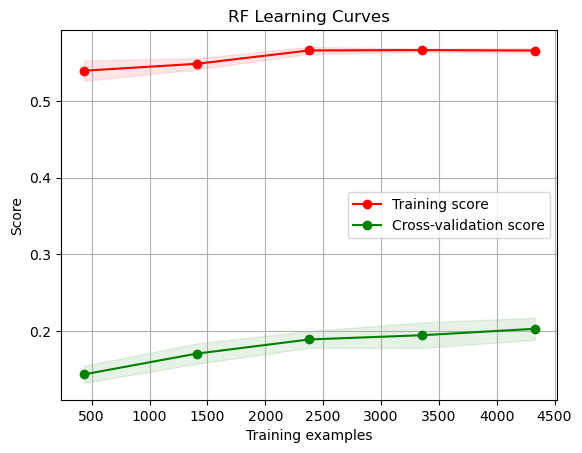

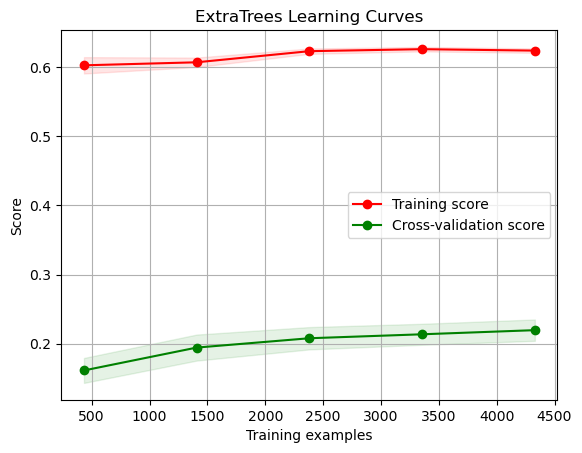

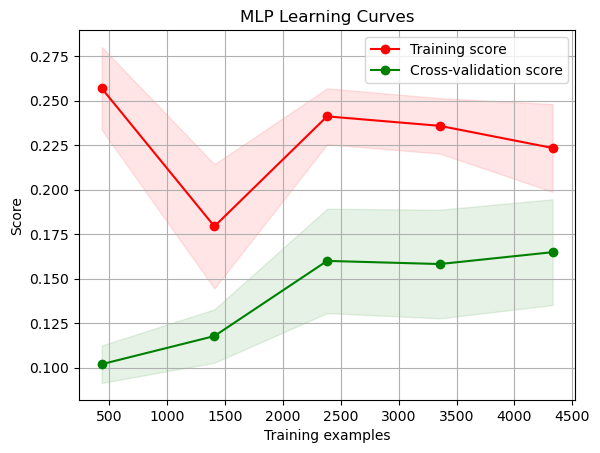

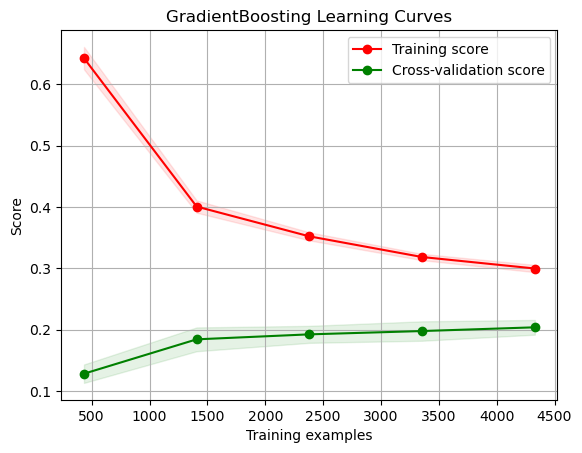

In [187]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestRegressor(n_estimators=250, max_depth=20, max_features='sqrt', min_samples_leaf=5, min_samples_split=2, oob_score=True)
et = ExtraTreesRegressor(max_depth=50, max_features=0.5, min_samples_leaf=5, min_samples_split=2, n_estimators=450)
mlp = MLPRegressor(activation='relu', alpha=0.0001, hidden_layer_sizes=(100,), learning_rate='constant', learning_rate_init=0.001, solver='adam')
gb = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, max_features='log2', min_samples_leaf=3, min_samples_split=2, subsample=1.0)

g = plot_learning_curve(rf, "RF Learning Curves", X_train, y_train, cv=kfold)
g = plot_learning_curve(et, "ExtraTrees Learning Curves", X_train, y_train, cv=kfold)
g = plot_learning_curve(mlp, "MLP Learning Curves", X_train, y_train, cv=kfold)
g = plot_learning_curve(gb, "GradientBoosting Learning Curves", X_train, y_train, cv=kfold)





## Slår sammen modellene

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor


import numpy as np
from sklearn.metrics import mean_squared_error


extraTree = ExtraTreesRegressor(max_depth=50, max_features=0.5, min_samples_leaf=5, min_samples_split=2, n_estimators=450)
mlp = MLPRegressor(activation='relu', alpha=0.0001, hidden_layer_sizes=(100,), learning_rate='constant', learning_rate_init=0.001, solver='adam')
gradient = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, max_features='log2', min_samples_leaf=5, min_samples_split=2, subsample=1.0)
randomForest = RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=5, min_samples_split=2, n_estimators=250, oob_score=True)

models = [extraTree, mlp, gradient, randomForest]
model_rmse = {} 


for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    # Beregn MSE og deretter RMSE
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    

    model_rmse[model.__class__.__name__] = rmse

    print(f"{model.__class__.__name__} - RMSE: {rmse:.4f}")


best_model_name = min(model_rmse, key=model_rmse.get)
best_model = [model for model in models if model.__class__.__name__ == best_model_name][0]


print(f"\nBeste modell basert på RMSE på valideringssettet: {best_model_name} med RMSE: {model_rmse[best_model_name]:.4f}")

#y_test_pred = best_model.predict(X_test)

#test_mse = mean_squared_error(y_test, y_test_pred)
#test_rmse = np.sqrt(test_mse)

#

# Skriv ut RMSE for testsettet
#print(f"RMSE på testsettet for {best_model_name}: {test_rmse:.4f}")



ExtraTreesRegressor - RMSE: 18.8304
MLPRegressor - RMSE: 19.9007
GradientBoostingRegressor - RMSE: 19.1507
RandomForestRegressor - RMSE: 19.1409

Beste modell basert på RMSE på valideringssettet: ExtraTreesRegressor med RMSE: 18.8304
